# Real-world Data Wrangling - Bitcoin vs Nvidia stock prices

In [1]:
!python -m pip install kaggle==1.6.12


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install --target=/workspace ucimlrepo

  Using cached ucimlrepo-0.0.7-py3-none-any.whl.metadata (5.5 kB)
  Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.0.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl.metadata (1.8 kB)
Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)
   ---------------------------------------- 0.0/163.0 kB ? eta -:--:--
   -- ------------------------------------- 10.2/163.0 kB ? eta -:--:--
   ---------------------- ----------------- 92.2/163.0 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 163.0/163.0 kB 1.6 MB/s eta 0:00:00
Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached numpy-2.0.0-cp312-cp312-win_amd64.whl (16.2 MB)
Using cached python_dateutil-2.9.


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup #importing required libraries.
import json
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Gather data



### **1.1.** Problem Statement
This analysis's goal is to explore the relationship between the Nvidia stock price and Bitcoin prices overtime. The timeline that will be used is 7 yeras(between 2017 and 2023) as these are the years where Bitcoin and Nvidia were active the most and brought the attnetion of retail and institutional investors. The aim is to uncover insights that highlight possible correlations, dependencies and possible trends between the 2 assets. Close Price and Volume are going to be our main variables to test, close price due to its nature of identifying how the investors thought of the asset by the end of the trading day, and Volume in order to compare how investors reacted day by day. 

#### Questions of the problem:
1- What are the average daily price movements (volatility) for Nvidia and Bitcoin over the period studied?  
2- Do the trading volumes of Nvidia and Bitcoin exhibit similar daily changes (correlation)?

#### **Dataset 1 - Bitcoin Prices**

Type: CSV File

Method: The dataset was downloaded as a CSV file from Yahoo Finance, then loaded to this project using the read_csv method
This dataset was gathered as it provides the main variables we're looking for this problem (close price, dates and volume)

Dataset variables:

*   *Variable 1: Date (the trading date)
*   *Variable 2: Open (the open price on the trading day)
*   *Variable 3: High (The highest Price the asset reached on the trading day)
*   *Variable 4: Low (The lowest Price the asset reached on the trading day)
*   *Variable 5: Close (the close price on the trading day)
*   *Variable 6: Adj Close (the close price on the trading day - Taking into consideration dividends)
*   *bitcoin doesn't provide dividends so adj close is equal to close
*   *Variable 7: Volume (total number of shares traded during the trading day)


In [5]:
#FILL IN 1st data gathering and loading method
df_btc = pd.read_csv('BTC-USD.csv')
df_btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550.0
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650.0
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400.0
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100.0
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800.0


#### Dataset 2

Type:API

Method: The data was gathered using the "API" method from https://www.alphavantage.co/.), The dataset provides the main variables we're looking for to test the tendencies and correlation between Nvidia and Bitcoin prices and volumes

Dataset variables:

*   *Variable 1: Date ( The trading day date - This has been assigned as the index when processing the dataset)
*   *Variable 2: Open (the open price on the trading day)
*   *Variable 3: High (The highest Price the asset reached on the trading day)
*   *Variable 4: Low (The lowest Price the asset reached on the trading day)
*   *Variable 5: Close (the close price on the trading day)
*   *Variable 6: Volume (total number of shares traded during the trading day)

In [6]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=NVDA&outputsize=full&apikey=XOZCRNTG99ZP23WT' 
# getting the API and assigning it to a variable named url
r = requests.get(url)
# performing a get request on the url
json_book =  json.loads(r.text) #converting the json script to python dictionary
json_book

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'NVDA',
  '3. Last Refreshed': '2024-07-03',
  '4. Output Size': 'Full size',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2024-07-03': {'1. open': '121.6600',
   '2. high': '128.2800',
   '3. low': '121.3600',
   '4. close': '128.2800',
   '5. volume': '215748955'},
  '2024-07-02': {'1. open': '121.1300',
   '2. high': '123.4100',
   '3. low': '121.0300',
   '4. close': '122.6700',
   '5. volume': '218373969'},
  '2024-07-01': {'1. open': '123.4700',
   '2. high': '124.8400',
   '3. low': '118.8300',
   '4. close': '124.3000',
   '5. volume': '284885534'},
  '2024-06-28': {'1. open': '124.5800',
   '2. high': '127.7100',
   '3. low': '122.7500',
   '4. close': '123.5400',
   '5. volume': '315516740'},
  '2024-06-27': {'1. open': '124.1000',
   '2. high': '126.4100',
   '3. low': '122.9200',
   '4. close': '123.9900',
   '5. volume': '252571693'},
  '2024-06-26': {'1. open

In [7]:
json_book = json.loads(r.content) #decoding the json file to prepare to convert it into a pandas dataframe
json_book

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'NVDA',
  '3. Last Refreshed': '2024-07-03',
  '4. Output Size': 'Full size',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2024-07-03': {'1. open': '121.6600',
   '2. high': '128.2800',
   '3. low': '121.3600',
   '4. close': '128.2800',
   '5. volume': '215748955'},
  '2024-07-02': {'1. open': '121.1300',
   '2. high': '123.4100',
   '3. low': '121.0300',
   '4. close': '122.6700',
   '5. volume': '218373969'},
  '2024-07-01': {'1. open': '123.4700',
   '2. high': '124.8400',
   '3. low': '118.8300',
   '4. close': '124.3000',
   '5. volume': '284885534'},
  '2024-06-28': {'1. open': '124.5800',
   '2. high': '127.7100',
   '3. low': '122.7500',
   '4. close': '123.5400',
   '5. volume': '315516740'},
  '2024-06-27': {'1. open': '124.1000',
   '2. high': '126.4100',
   '3. low': '122.9200',
   '4. close': '123.9900',
   '5. volume': '252571693'},
  '2024-06-26': {'1. open

In [8]:
#Extracting the Time Series (Daily) part of the JSON data
time_series = json_book.get('Time Series (Daily)', {})

# Converting the extracted data into a Pandas DataFrame and assigning it as index
df_nvidia = pd.DataFrame.from_dict(time_series, orient='index')

#Renaming the DataFrame columns to be consistent with the bitcoin dataframe columns names
df_nvidia.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Convert index to datetime format in order to perform future calculations on it
df_nvidia.index = pd.to_datetime(df_nvidia.index)

# Sorting the DataFrame by date
df_nvidia.sort_index(inplace=True)

# Converting columns to appropriate data types (float for price columns and int for volume)
df_nvidia = df_nvidia.astype({
    'Open': float,
    'High': float,
    'Low': float,
    'Close': float,
    'Volume': int
})


df_nvidia.head()

,Open,High,Low,Close,Volume
1999-11-01,21.75,24.38,21.75,23.50,1630300
1999-11-02,23.94,25.13,23.75,25.00,1744800
1999-11-03,26.00,28.13,25.81,27.44,4191000
1999-11-04,27.75,29.94,27.75,29.19,2625700
1999-11-05,30.00,30.25,26.88,28.25,1284100


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [9]:
#Optional: store the raw data in your local data store
df_nvidia.to_csv('nvda_daily_prices.csv')

## 2. Assess data



### Quality Issue 1: Checking Bitcoin Dataset

For the first data frame (Bitcoin prices) I will print a sample for 15 rows to see visually if there are any issues.

In [10]:
#FILL IN - Inspecting the dataframe visually
df_btc.sample(15,random_state=1)

,Date,Open,High,Low,Close,Adj Close,Volume
306,2015-11-02,325.941986,365.359985,323.209015,361.188995,361.188995,1.019180e+08
3249,2023-11-22,35756.554688,37856.980469,35670.972656,37432.339844,37432.339844,2.439725e+10
3023,2023-04-10,28336.027344,29771.464844,28189.271484,29652.980469,29652.980469,1.928240e+10
1933,2020-04-15,6845.561523,6928.664551,6633.402832,6642.109863,6642.109863,3.228831e+10
171,2015-06-20,244.529999,245.828003,240.626999,245.212006,245.212006,2.060810e+07
1564,2019-04-12,5061.200684,5103.274414,4955.852539,5089.539063,5089.539063,1.367521e+10
725,2016-12-25,899.651978,899.651978,862.424011,896.182983,896.182983,1.436650e+08
2461,2021-09-25,42840.890625,42996.257813,41759.921875,42716.593750,42716.593750,3.160472e+10
2899,2022-12-07,17089.505859,17109.376953,16750.558594,16848.126953,16848.126953,1.967540e+10
671,2016-11-01,701.336975,736.452026,701.336975,729.793030,729.793030,1.305270e+08


Based on the showed figures, we can see there are no issues when it comes to any dates, or any values in the prices of bitcoin.

Another thing we can programmatically check is whether we have any duplication in the dates. As each row should be unique and have no duplicates in the dates column, but before that I have to make sure that the date column is actually a date type

In [11]:
df_btc.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

We can see that the date datatype is saved as object, it should be changed to a date format

In [12]:
#FILL IN - Inspecting the dataframe programmatically
duplicates_date = df_btc['Date'].duplicated()
print(duplicates_date.sum())

2


We can see there are 2 duplicates in the dataset for the bitcoin prices

In [13]:
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3290 entries, 0 to 3289
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3290 non-null   object 
 1   Open       3289 non-null   float64
 2   High       3289 non-null   float64
 3   Low        3289 non-null   float64
 4   Close      3289 non-null   float64
 5   Adj Close  3289 non-null   float64
 6   Volume     3289 non-null   float64
dtypes: float64(6), object(1)
memory usage: 180.1+ KB


Also, there seems that we either have an extra date, or an entry that has a date but other columns are missing

We have an issue that the date column in the bitcoin dataframe isn't classified as a date, this can cause issues when trying to perform functions on that column, I will work on fixing that in the next sections, I also verified that we had no duplicates in the date column.

### Quality Issue 2: Checking NVIDIA Dataset

In [14]:
#inspecting the second dataframe visually (dataframe belongs to Nvidia stock prices)- Inspecting the dataframe visually
df_nvidia.sample(15,random_state=2)

,Open,High,Low,Close,Volume
2006-03-10,48.15,48.7900,46.960,47.39,4346500
2003-08-19,17.00,18.0000,16.990,17.90,11699800
2020-01-21,247.81,249.2900,246.570,247.94,5321260
2018-05-25,248.20,249.9400,246.760,249.28,7302782
2022-05-13,167.88,179.2843,165.925,177.06,67043651
2006-07-27,20.51,21.3500,20.170,20.54,11572267
2017-01-20,106.08,106.8000,103.120,104.01,12300557
2020-06-25,374.23,380.2000,367.290,379.60,9401800
2019-04-02,183.25,184.7900,181.520,183.00,11022996
2009-04-30,11.09,11.8000,11.000,11.48,27756900


So far, the stock prices for Nvidia seems to reflect true values, there is no high and low changes in the open and close prices.

In [15]:
#FILL IN - Inspecting the dataframe programmatically
df_nvidia.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume      int32
dtype: object

Since the Index column (which I assigned previous as datetime data type) isn't shown using the dtypes method, I had to use another method which is .index.dtype to ensure that the datatype of the index is actually a datetime.

In [16]:
duplicates_date_nvidia = df_nvidia.index.duplicated()
print(duplicates_date_nvidia.sum())

0


In [17]:
index_dtype=df_nvidia.index.dtype
print(index_dtype)

datetime64[ns]


There doesn't seem to be an actual data quality issue with the second data set (that is related to Nvidia stock prices)

### Tidiness Issue 1: Checking Bitcoin Dataset

In [18]:
#FILL IN - Inspecting the dataframe visually
df_btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550.0
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650.0
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400.0
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100.0
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800.0


In [19]:
#FILL IN - Inspecting the dataframe programmatically
df_btc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3289.000000,3289.000000,3289.000000,3289.000000,3289.000000,3.289000e+03
mean,15028.675118,15380.249096,14650.577023,15040.501969,15040.501969,1.707501e+10
std,16243.334142,16633.745885,15806.443574,16246.206915,16246.206915,1.915124e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,7.860650e+06
25%,1183.250000,1205.890015,1171.859985,1187.810059,1187.810059,3.326030e+08
50%,8658.991211,8826.943359,8389.889648,8659.487305,8659.487305,1.276360e+10
75%,25121.673828,25921.976563,24797.167969,25162.654297,25162.654297,2.741007e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


For the bitcoin dataset, we can see that we have 2 column, one named "close", and the other is named "adj close", the adj close column usually is displayed to stock as it takes into consideration the dividends these stocks make. However, in the case of crypto currencies they don't provide dividends, so the Adj Close is equal to the Close price. We will need to confirm that both columns are identical in the data set then remove the Adj Close column from the dataframe.

### Tidiness Issue 2: Nvidia Dataset

In [20]:
#FILL IN - Inspecting the dataframe visually
df_nvidia.sample(n=10,random_state=4)

,Open,High,Low,Close,Volume
2020-12-30,519.6124,528.5500,515.87,525.83,5634929
2002-11-01,11.7200,14.2700,11.70,14.10,17740300
2004-05-04,20.5500,21.8100,20.50,21.55,6436500
2004-08-04,14.8000,15.1100,14.63,14.97,4231800
2007-04-24,31.9000,32.8400,31.69,32.55,17134800
2012-04-03,15.4400,15.4576,15.00,15.08,10761900
2008-09-23,11.0800,11.4900,10.81,10.85,20536700
2017-11-21,215.6900,216.5200,214.40,216.05,9858634
2001-05-11,79.9900,80.5000,76.54,78.14,3838400
1999-12-27,47.3800,47.4400,44.13,44.63,421700


The columns and dataset in general seems to respect the data tidiness principle

In [21]:
#FILL IN - Inspecting the dataframe programmatically
df_nvidia.describe()

,Open,High,Low,Close,Volume
count,6207.000000,6207.000000,6207.000000,6207.000000,6.207000e+03
mean,113.484096,115.613552,111.268485,113.542235,1.644492e+07
std,169.206561,172.007509,166.137422,169.304373,2.346929e+07
min,6.000000,6.380000,5.750000,5.900000,1.483000e+05
25%,16.940000,17.280000,16.615000,16.980000,6.307559e+06
50%,32.370000,33.060000,31.700000,32.340000,1.036489e+07
75%,158.640000,161.730000,155.685000,158.745000,1.813911e+07
max,1240.480000,1255.870000,1183.200000,1224.400000,6.554847e+08


In [22]:
df_nvidia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6207 entries, 1999-11-01 to 2024-07-03
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6207 non-null   float64
 1   High    6207 non-null   float64
 2   Low     6207 non-null   float64
 3   Close   6207 non-null   float64
 4   Volume  6207 non-null   int32  
dtypes: float64(4), int32(1)
memory usage: 395.7 KB


As with the data quality, data tidiness in the dataframe of Nvidia seems to be respecting the data tidiness principles. no fixes are required

## 3. Clean data


In [23]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted
df_bitcoin = df_btc.copy()
df_nvd = df_nvidia.copy()

### **Quality Issue 1: Datatype of the date in Bitcoin Dataset**

Will start with the first quality issue in the first dataset. which is fixing the data type of the date column, will change it to datetype using the code below. I will also change the Volume column datatype to integer as it shouldn't contain float values.

In [24]:
# FILL IN - Apply the cleaning strategy
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])

In [25]:
# FILL IN - Validate the cleaning was successful
df_bitcoin.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

Another check is trying to check The NaN values in the dataset

In [26]:
#locating the rows that have Null values
nan_rows = df_bitcoin[df_bitcoin.isnull().any(axis=1)]
nan_rows

,Date,Open,High,Low,Close,Adj Close,Volume
3058,2023-05-15,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#since its data related to prices of assets, we can carry forward the price of the previous day to the missing day on all columns
df_bitcoin[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = df_bitcoin[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].fillna(method='ffill')
print(df_bitcoin[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].isna().any()) #Print if there are any NAs in any of the columns

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool


C:\Users\Pc\AppData\Local\Temp\ipykernel_2972\2395798742.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bitcoin[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = df_bitcoin[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].fillna(method='ffill')


We changed the datatype of the Date column from Object to datetime in order to help us apply different transactions on that column. On the other hand, the datatype of the Volume column was changed from Float to Integer since it has whole values, this way we can save space in the memory.

### **Quality Issue 2: Removing duplicates in Bitcoin Dataset**

In [28]:
#Retrieving duplicated rows that were found in the bitcoin dataframe using the date, as date shouldn't be duplicated 
#based on our criterea for this dataset
duplicated_rows = df_bitcoin.loc[df_bitcoin.duplicated(['Date'])]
duplicated_rows

,Date,Open,High,Low,Close,Adj Close,Volume
14,2015-01-14,223.893997,223.893997,171.509995,178.102997,178.102997,9.763870e+07
1225,2018-05-08,9380.870117,9462.750000,9127.769531,9234.820313,9234.820313,7.415870e+09


In [29]:
#dropping duplicates in date column
df_bitcoin = df_bitcoin.drop_duplicates(subset=['Date'])


In [30]:
#FILL IN - Validate the cleaning was successful
duplicates_any = df_bitcoin['Date'].duplicated().sum()
print(duplicates_any)

0


After idedntifying the duplicates based on date we dropped the duplicated rows. The check was performed solely based on dates as the prices of bitcoin can be duplicated since they move up and down everyday.

### **Tidiness Issue : None**

As checked in the previous sector, there were no issues when it comes to the tidiness of the datasets as they were structured based on the tidiness principles.

### **Remove unnecessary variables and combine datasets**



Our comparison and analysis will be built based on the close price of each day for Bitcoin and Nvidia. we are solely depending on the close price for both datasets and the Date will be for the last 7 years between 3 January 2017 till 29 December 2023

In [31]:
#FILL IN - Remove unnecessary variables and combine datasets
#First, Filter the datasets based on the timeline we're looking for, I will identify the start data and end date
start_date = '2017-01-03'
end_date = '2023-12-29'
btc_filtered = df_bitcoin[(df_bitcoin['Date'] >= start_date) & (df_bitcoin['Date'] <= end_date)]
nvd_filtered = df_nvd[(df_nvd.index >= start_date) & (df_nvd.index <= end_date)] 
#in the case of Nvidia, dates are assinged as the index, so we used to filter the timeline we're looking for
#check for the adjustments
print(btc_filtered['Date'].max())
print(btc_filtered['Date'].min())
print(nvd_filtered.index.max())
print(nvd_filtered.index.min())

2023-12-29 00:00:00
2017-01-03 00:00:00
2023-12-29 00:00:00
2017-01-03 00:00:00


As its known, Nvidia is a stock while Bitcoin is a cryptocurrency. Cryprtocurrencies are traded daily, while stocks don't trade on weekends. so I will first need to check if we have the same price observation count for both datasets.

In [32]:
btc_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2552 entries, 734 to 3286
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2552 non-null   datetime64[ns]
 1   Open       2552 non-null   float64       
 2   High       2552 non-null   float64       
 3   Low        2552 non-null   float64       
 4   Close      2552 non-null   float64       
 5   Adj Close  2552 non-null   float64       
 6   Volume     2552 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 159.5 KB


In [33]:
nvd_filtered.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1760 entries, 2017-01-03 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1760 non-null   float64
 1   High    1760 non-null   float64
 2   Low     1760 non-null   float64
 3   Close   1760 non-null   float64
 4   Volume  1760 non-null   int32  
dtypes: float64(4), int32(1)
memory usage: 75.6 KB


As we can see, we have a difference in observations count of 792 (2552 - 1760). We will merge both datasets based on the dates we have in Nvidia which has the lowest number of observations, the reason for that is that when we compare both datasets we want to be able to compare the same dates. We can't perfrom the 'ffill' method on Nvidia because that will cause us to have a 0 growth on 792 observations which can cause inaccurate results. Before merging the 2 datasets we will remove all columns except dates, close price and Volume column on both datasets since our analysis questions are based on those.

In [34]:
nvd_filtered = nvd_filtered.drop(['Open','High','Low'],axis=1,errors = 'ignore')
btc_filtered = btc_filtered.drop(['Open','High','Low','Adj Close'],axis=1,errors = 'ignore')
#check
nvd_filtered.info()
print('===========================')
btc_filtered.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1760 entries, 2017-01-03 to 2023-12-29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1760 non-null   float64
 1   Volume  1760 non-null   int32  
dtypes: float64(1), int32(1)
memory usage: 34.4 KB
<class 'pandas.core.frame.DataFrame'>
Index: 2552 entries, 734 to 3286
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2552 non-null   datetime64[ns]
 1   Close   2552 non-null   float64       
 2   Volume  2552 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 79.8 KB


Now we will merge both datasets using Date in the bitcoin dataset and index in the nvidia dataset. will also use the suffixes attribute in order to differentiate between the columns in both datasets. 

In [35]:
merged_df = pd.merge(nvd_filtered,btc_filtered,left_index=True,right_on='Date',how='left', suffixes=('_nvidia', '_bitcoin'))
merged_df.set_index('Date', inplace=True)
merged_df.head()

,Close_nvidia,Volume_nvidia,Close_bitcoin,Volume_bitcoin
Date,,,,
2017-01-03,102.01,37549876,1043.839966,185168000.0
2017-01-04,104.39,29980506,1154.729980,344945984.0
2017-01-05,101.74,24607382,1013.380005,510199008.0
2017-01-06,103.10,20571416,902.200989,351876000.0
2017-01-09,107.28,22906225,902.828003,141876992.0


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [36]:
#FILL IN - saving data
df_bitcoin.to_csv('cleaned_data/bitcoin_clean.csv',index=False,encoding = 'utf-8') #cleaned data of bitcoin
df_nvd.to_csv('cleaned_data/nvidia_clean.csv',index=False,encoding = 'utf-8') #cleaned data of Nvidia
nvd_filtered.to_csv('filtered_data/nvidia_filtered.csv',index=False,encoding = 'utf-8') #Nvidia filtered data for our analysis
btc_filtered.to_csv('filtered_data/bitcoin_filtered.csv',index=False,encoding = 'utf-8') #Bitcoin filtered data for our analysis
merged_df.to_csv('merged_data/merged_data.csv',index=False,encoding = 'utf-8') #The final and merged data for our analysis


## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

Question 1: What are the average daily price movements (volatility) for Nvidia and Bitcoin over the period studied?

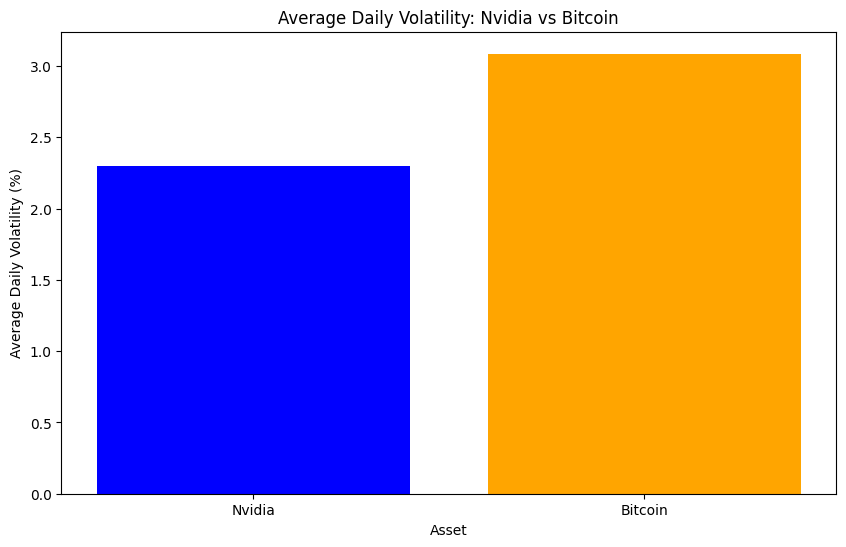

In [37]:
#Visual 1 - FILL IN

merged_df['Nvidia Daily Change'] = merged_df['Close_nvidia'].pct_change() * 100
merged_df['Bitcoin Daily Change'] = merged_df['Close_bitcoin'].pct_change() * 100

# Calculating average daily volatility
avg_volatility_nvidia = merged_df['Nvidia Daily Change'].abs().mean()
avg_volatility_bitcoin = merged_df['Bitcoin Daily Change'].abs().mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(['Nvidia', 'Bitcoin'], [avg_volatility_nvidia, avg_volatility_bitcoin], color=['blue', 'orange'])
plt.title('Average Daily Volatility: Nvidia vs Bitcoin')
plt.xlabel('Asset')
plt.ylabel('Average Daily Volatility (%)')
plt.show()

Based on the results of the Barchart we see above, we can see that the average daily volatility in the prices of bitcoin is around 3% during the last 3 years while Nvidia's average daily volatility is less with around 2.4%. This makes Bitcoin a more attractive asset in case a daily trader is planning to use a swing strategy trading.

Another way to visualize the question we are asking is to check how the data has been changing everyday during the time period we chose. We can clearly see that the price changes were very volatile in both assets (Nvidia and Bitcoin), Except for the year 2021 we can see that the changes in price of Bitcoin were higher which explains the Bar chart above

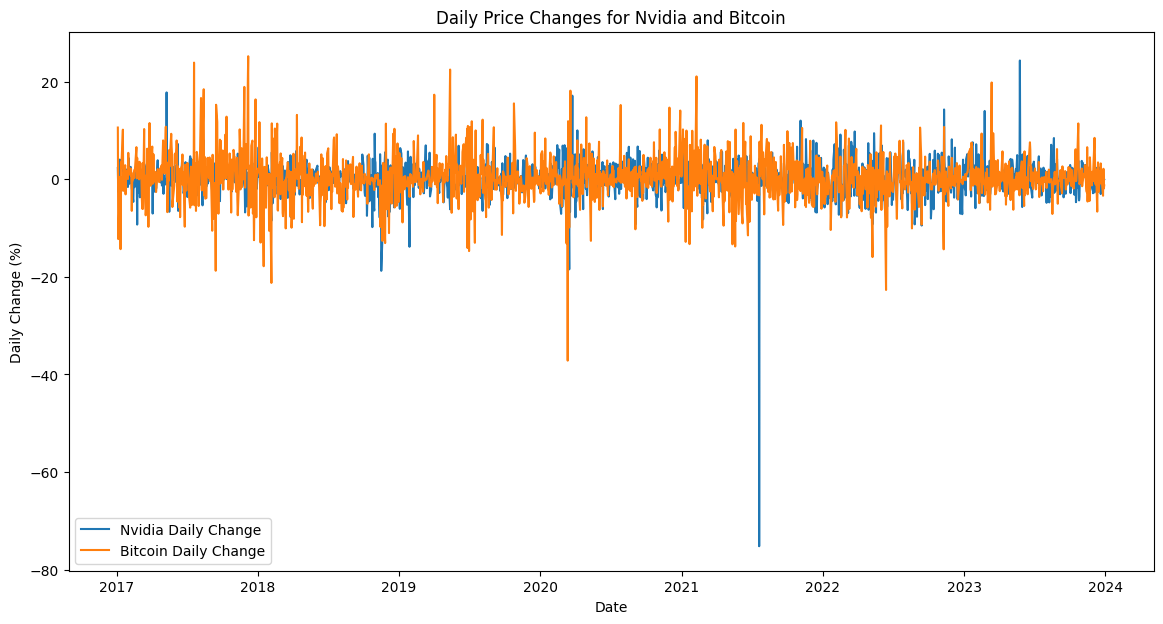

In [38]:
plt.figure(figsize=(14, 7))
plt.plot(merged_df.index, merged_df['Nvidia Daily Change'], label='Nvidia Daily Change')
plt.plot(merged_df.index, merged_df['Bitcoin Daily Change'], label='Bitcoin Daily Change')
plt.xlabel('Date')
plt.ylabel('Daily Change (%)')
plt.title('Daily Price Changes for Nvidia and Bitcoin')
plt.legend()
plt.show()

Finally. We want to check if there's any correlation in prices changes between Nvidia and Bitcoin. In other words to see if the change direction in Nivida Price had the same change direction in the prices of Bitcoin.

In [39]:
correlation = merged_df[['Nvidia Daily Change', 'Bitcoin Daily Change']].corr()
print(correlation)

                      Nvidia Daily Change  Bitcoin Daily Change
Nvidia Daily Change              1.000000              0.201983
Bitcoin Daily Change             0.201983              1.000000


There seems a small positive correlation, 0.2 is closer to 0 than 1, so we can see there's a very slight positive correlation between these 2 assets prices. We will visualize it using the graph below

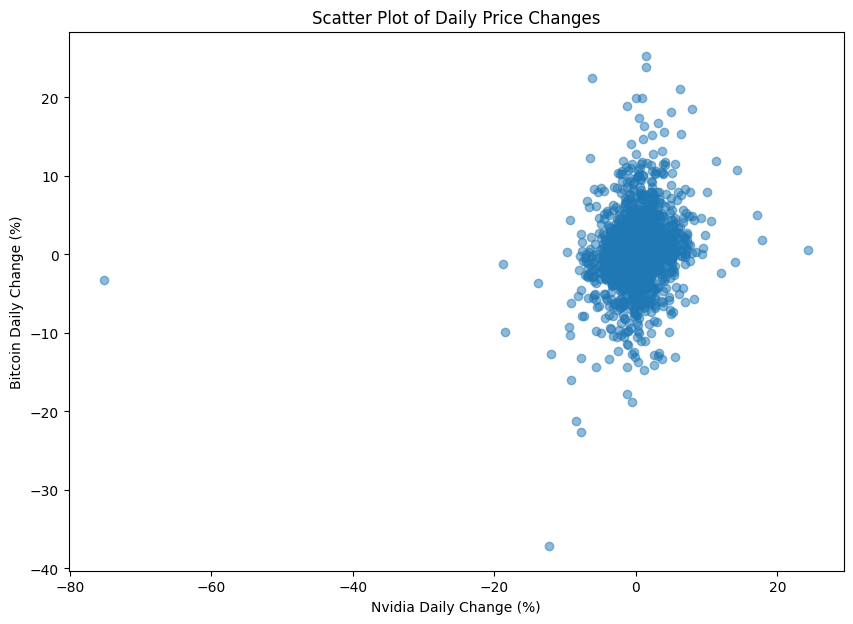

In [40]:
plt.figure(figsize=(10, 7))
plt.scatter(merged_df['Nvidia Daily Change'], merged_df['Bitcoin Daily Change'], alpha=0.5)
plt.xlabel('Nvidia Daily Change (%)')
plt.ylabel('Bitcoin Daily Change (%)')
plt.title('Scatter Plot of Daily Price Changes')
plt.show()

As we can see from the scatter plot above, No actual line can be drown and a correlation can't be seen between the changes in prices of Nvidia and Bitcoin

Question 2: Do the trading volumes of Nvidia and Bitcoin exhibit similar daily changes?

In [41]:
# Calculate the daily percentage change in volume
merged_df['Nvidia Volume Change'] = merged_df['Volume_nvidia'].pct_change()
merged_df['Bitcoin Volume Change'] = merged_df['Volume_bitcoin'].pct_change()


merged_df.dropna(subset=['Nvidia Volume Change', 'Bitcoin Volume Change'], inplace=True) #This is to drop the first row that will be NA

volume_change_correlation = merged_df[['Nvidia Volume Change', 'Bitcoin Volume Change']].corr() #calculating the correlation between the volumes
print(volume_change_correlation)

                       Nvidia Volume Change  Bitcoin Volume Change
Nvidia Volume Change               1.000000               0.058864
Bitcoin Volume Change              0.058864               1.000000


No correlation can be observed between the volume change of Nvidia and Bitcoin. I will visualize it in the code below in a scatter plot

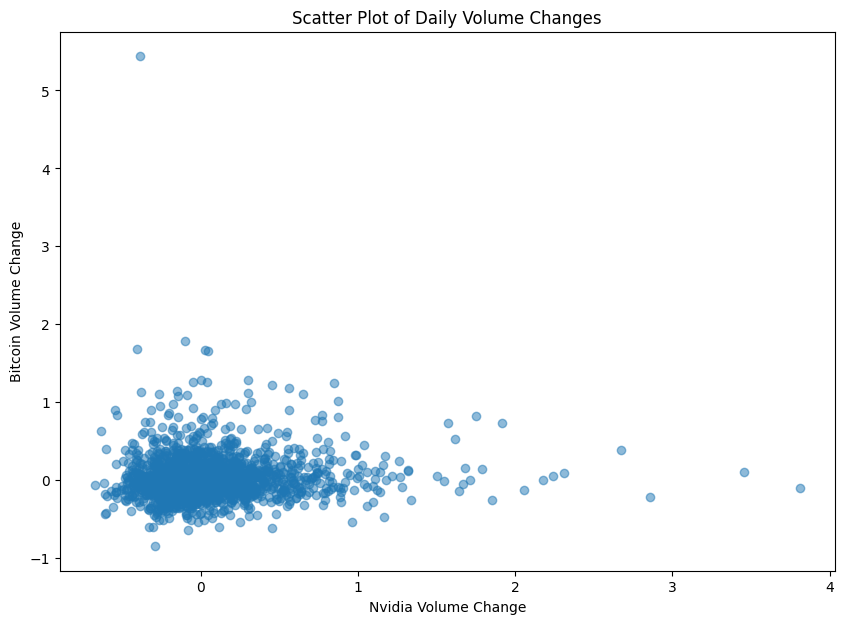

In [42]:

plt.figure(figsize=(10, 7))
plt.scatter(merged_df['Nvidia Volume Change'], merged_df['Bitcoin Volume Change'], alpha=0.5)
plt.xlabel('Nvidia Volume Change')
plt.ylabel('Bitcoin Volume Change')
plt.title('Scatter Plot of Daily Volume Changes')
plt.show()

A line plot is another way to visualize the correlation between the 2 assets.

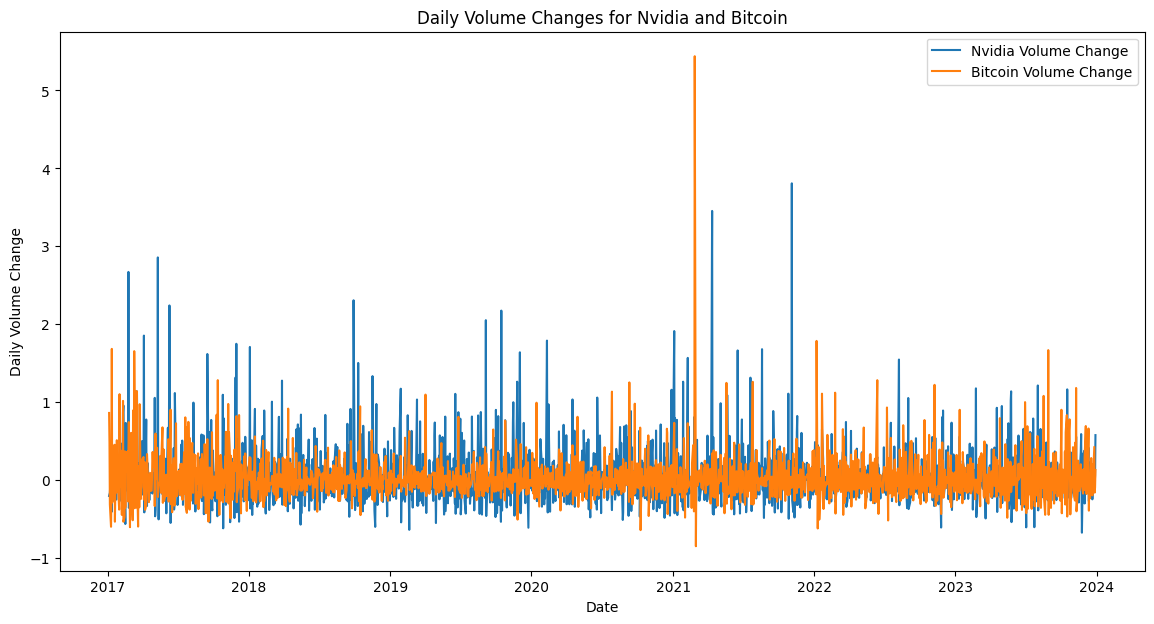

In [43]:
# Line plot for visual comparison
plt.figure(figsize=(14, 7))
plt.plot(merged_df.index, merged_df['Nvidia Volume Change'], label='Nvidia Volume Change')
plt.plot(merged_df.index, merged_df['Bitcoin Volume Change'], label='Bitcoin Volume Change')
plt.xlabel('Date')
plt.ylabel('Daily Volume Change')
plt.title('Daily Volume Changes for Nvidia and Bitcoin')
plt.legend()
plt.show()

As we can see in the last 2 visualizations, No correlation can be observed between the trading volume in Bitcoin vs Nvidia.

Conclusion: 
There seems to be no actual and visible correlation between the price movements or the volume of Nvidia and Bitcoin. Despite some articles claiming the existence of such correlation on the internet but the actual data says otherwise.

Reflection:
if there was more time to complete this project, I would try to get an API for financial news and see if these 2 assets react differently or similarly to the news that is published, the price movement and volumes alone can be misleading if we depend solely on their outputs. The existence of NA values in the bitcoin dataset when downloaded can mean an issue in the database of the provider of data, which also can require further investigation on the data quality itself (whether the numbers are actually true).